In [1]:
import xarray as xr, datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from zutils.gif import gif_maker

import importlib
import zutils
importlib.reload(zutils.gif) 
from zutils.gif import gif_maker


f = r'E:\Experiments\rs19\archive_FV00\Signature 1000\[RS2019]_[RS19_REC]_[L150]_[28]_[Signature 1000]_[100460]_[2of59].nc'



In [2]:
ds = xr.open_dataset(f)
ds.load()

<xarray.Dataset>
Dimensions:                   (beam: 5, cartesian_axes: 3, height: 254, time: 189616)
Coordinates:
  * beam                      (beam) int32 1 2 3 4 5
  * cartesian_axes            (cartesian_axes) int32 1 2 3
  * height                    (height) float64 0.1 0.13 0.16 ... 7.63 7.66 7.69
  * time                      (time) datetime64[ns] 2019-03-06T04:23:59.06340...
    lat_nom                   float64 -18.01
    lon_nom                   float64 119.2
    z_nom                     float64 150.3
Data variables: (12/21)
    vel_dolfyn                (beam, height, time) float32 -0.0181 ... 0.0845
    vel_enu                   (cartesian_axes, height, time) float32 -0.06796...
    vel_xyz                   (cartesian_axes, height, time) float32 -0.03774...
    four_beam_error_velocity  (height, time) float64 nan nan nan ... nan nan nan
    pressure                  (time) float32 147.1 147.1 147.1 ... 146.4 146.4
    temperature               (time) float32 19.8 19.8 19.8 ... 19.17 19.18
    ...                        ...
    qc_velocity               (beam, height, time) float32 -999.0 1.0 ... 1.0
    qc_velocity3              (cartesian_axes, height, time) float64 -999.0 ....
    qc_temperature            (time) float32 -999.0 -999.0 ... -999.0 -999.0
    qc_pressure               (time) float32 -999.0 -999.0 ... -999.0 -999.0
    qc_compass                (time) float32 -999.0 -999.0 ... -999.0 -999.0
    qc_tilt                   (time) float32 -999.0 -999.0 ... -999.0 -999.0
Attributes: (12/33)
    title:                           Measured data from a Nortek Signature
    institution:                     The University of Western Australia
    institution_division:            Ocean Dynamics
    source:                          Nortek Signature ADCP
    project:                         RS2019
    history:                         
    ...                              ...
    nominal_site_depth:              150.0
    pressure_sensor_height_asb:      
    nominal_instrument_height_asb:   0.29
    nominal_instrument_orientation:  
    timezone:                        UTC
    is_profile_data:                 0

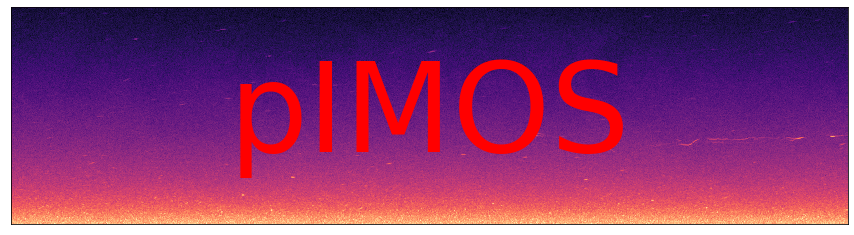

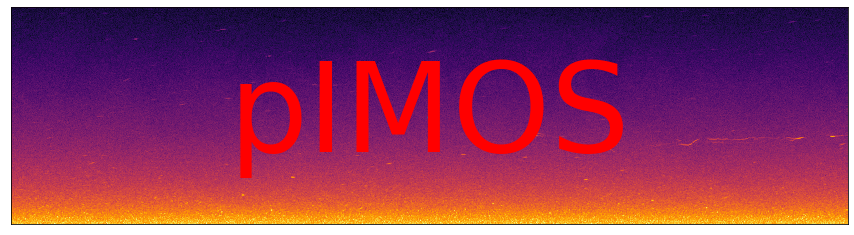

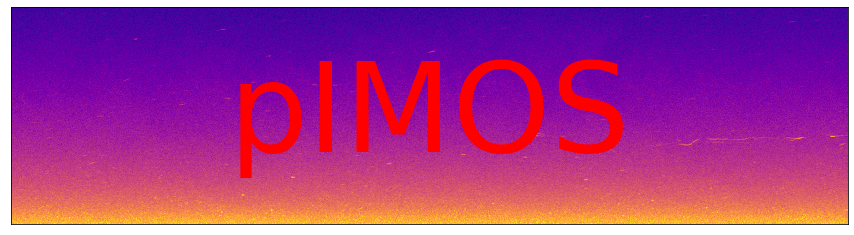

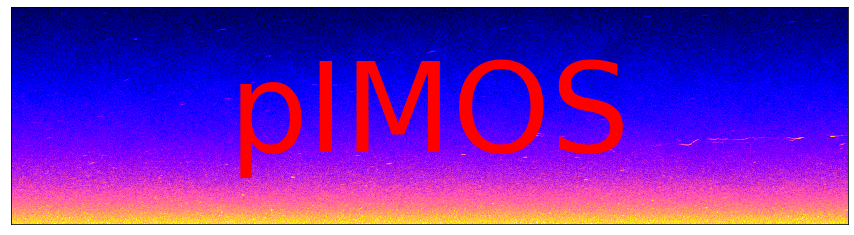

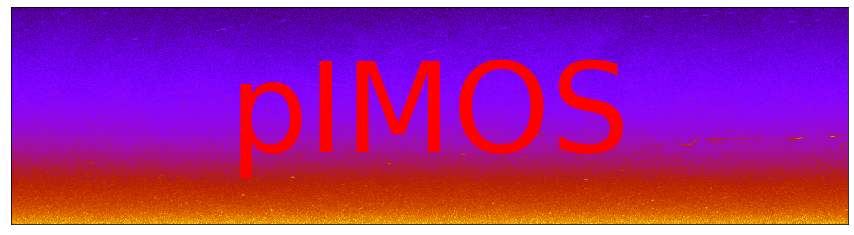

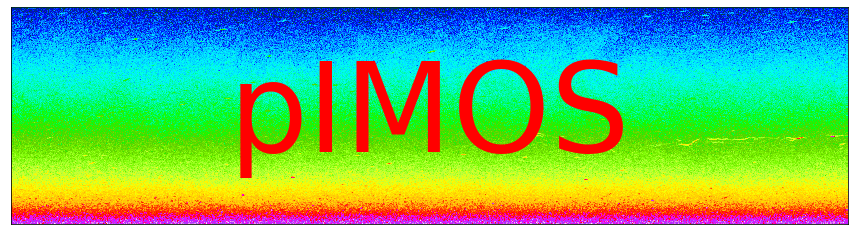

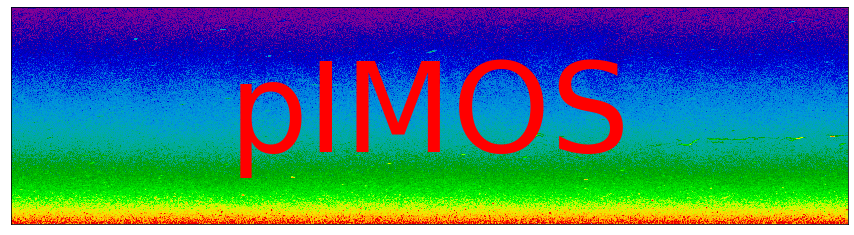

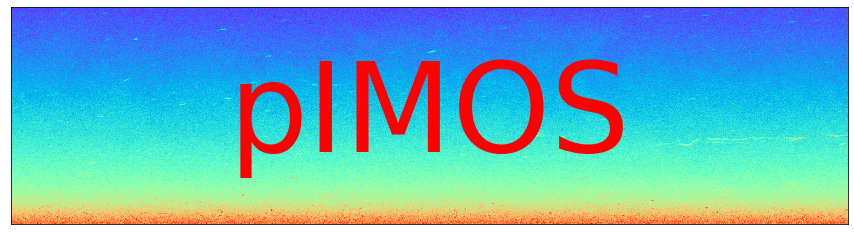

In [59]:
gm = gif_maker('dirtworm', 'gif')

def get_plot(cmap='rainbow'):
    
    fig = plt.figure(figsize=(15, 4))
    n = 1000
    da = ds.echo[4, :, 0:n]
    plt.pcolor(da, cmap=cmap)
    
    t = 500
    z = 125
    if False:
        t = ztime.datetime64_2_datetime_single(da.time.values[t])
        z = da.height.values[z]
    
    plt.plot(t, z, '.')
    plt.text(t, z, 'pIMOS', fontsize=125, ha='center', va='center', c='r')
    plt.xticks([])
    plt.yticks([])
    return fig
    
cmaps = ['magma', 'inferno', 'plasma', 'gnuplot2', 'gnuplot', 'gist_ncar', 'nipy_spectral', 'rainbow', ]
# cmaps = ['magma',  ]
for cmap in cmaps:
    
    fig = get_plot(cmap)
    
    gm.capture_fig(fig)
    
gm.make_gif(fps=5)

Text(2019-03-06 04:26:04.063429, 0, 'pIMOS')

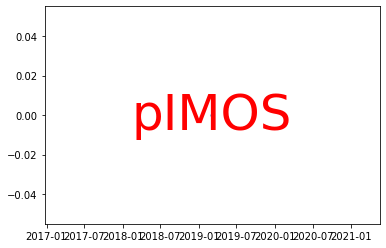

In [41]:
ds

import zutils.time as ztime

plt.figure()
t = ztime.datetime64_2_datetime_single(ds.time.values[500])
# t = datetime.datetime(2017, 3, 4)
plt.plot(t, 0, '.')
plt.text(t, 0, 'pIMOS', fontsize=50, ha='center', va='center', c='r')
# plt.text(1, 0, 'pIMOS')

# plt.text(, ds.height.values[100], 'pIMOS', fontsize=50, ha='center', va='center', c='r')
# plt.text(0, 1, 'pIMOS', fontsize=50, ha='center', va='center', c='r')
